<a href="https://colab.research.google.com/github/sagarrokad1/Bank-Marketing-Effectiveness-Prediction/blob/main/Self_Notebook_of_Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

## Loading Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings('ignore')

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading Rossman Dataset
df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Bank Marketing Effectiveness Prediction - Sagar Rokad/Data/bank-full.csv',delimiter=';')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
df.shape

(45211, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

## **EDA on Categorical variables**

### **List of numeric columns**

In [11]:
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

### **List of Categorical columns**

In [12]:
category_cols = list(df.select_dtypes(include=['object']))
category_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

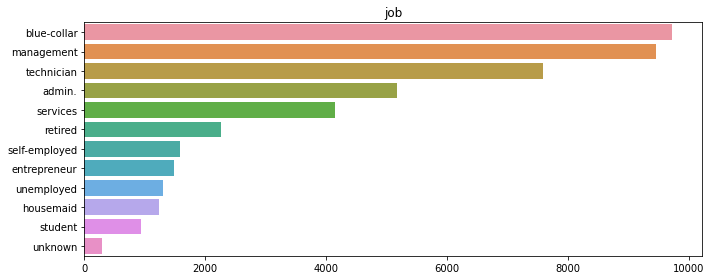

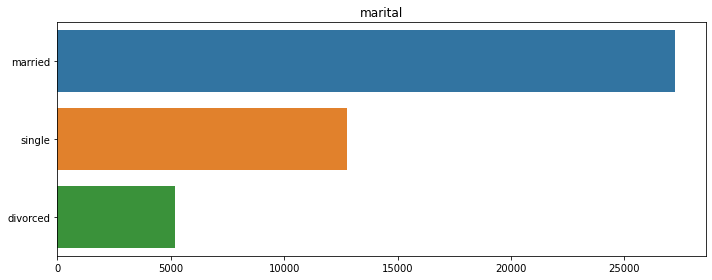

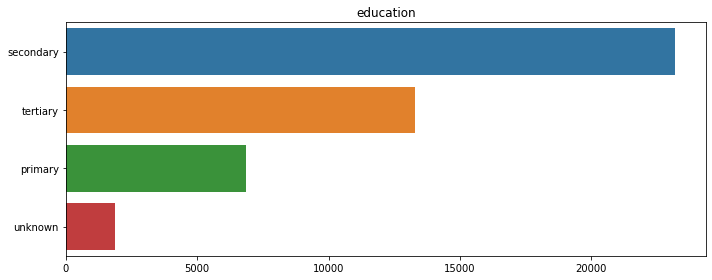

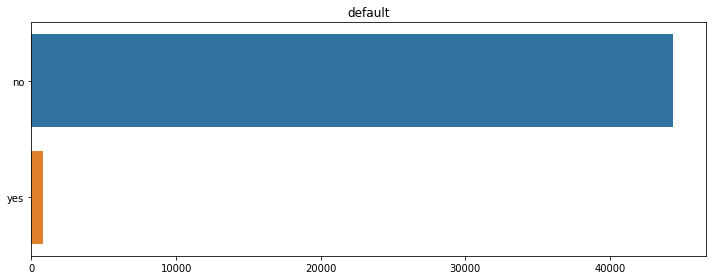

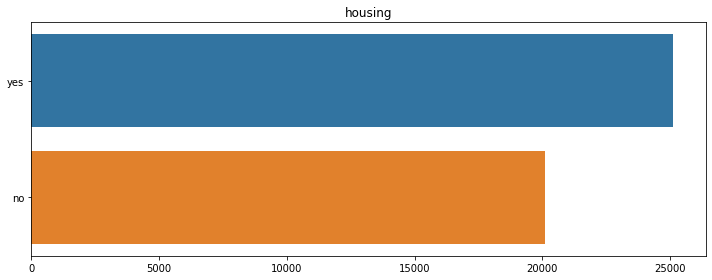

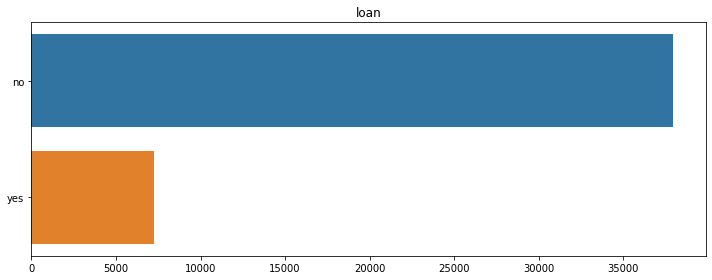

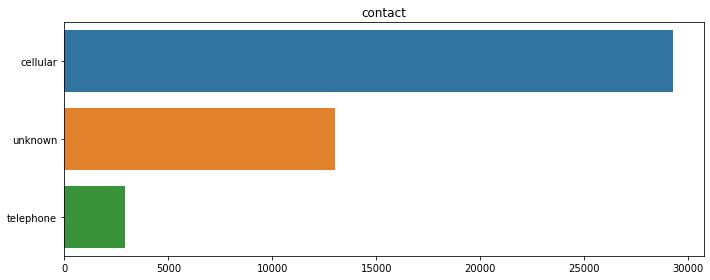

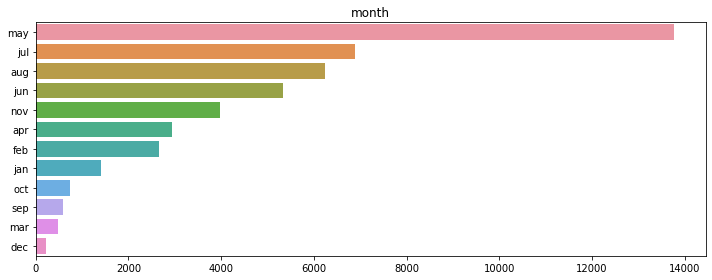

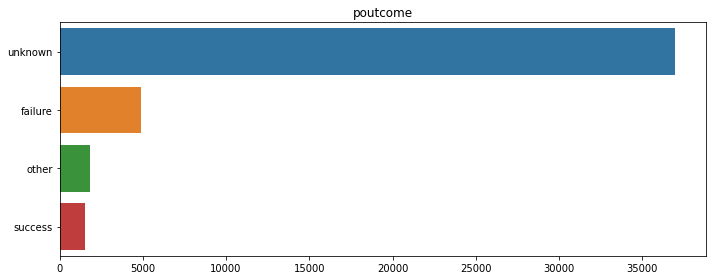

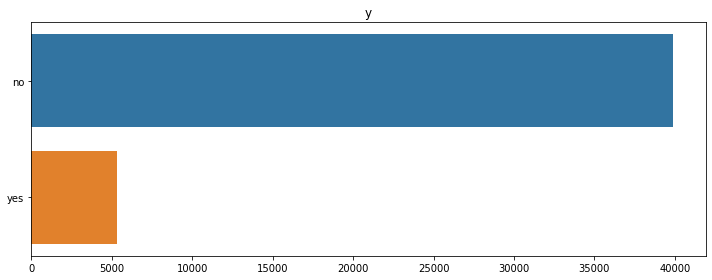

In [13]:
for col in category_cols:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

In [14]:
df.groupby(['job', 'y']).size().reset_index(name='counts')

,job,y,counts
0,admin.,no,4540
1,admin.,yes,631
2,blue-collar,no,9024
3,blue-collar,yes,708
4,entrepreneur,no,1364
5,entrepreneur,yes,123
6,housemaid,no,1131
7,housemaid,yes,109
8,management,no,8157
9,management,yes,1301


## **List of normalized relative frequency of the target class per category.**

Normalized distribution of each class per feature and plotted difference between positive and negative frequencies. Positive values imply this category favors clients that will subscribe and negative values categories that favor not buying the product.



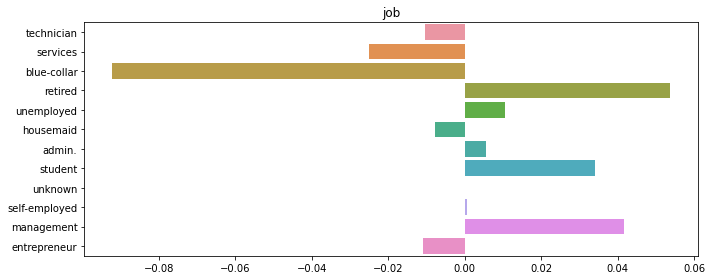

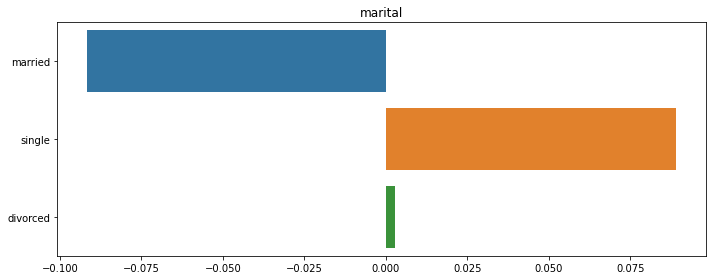

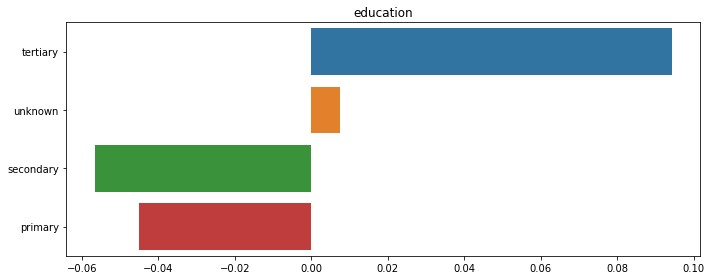

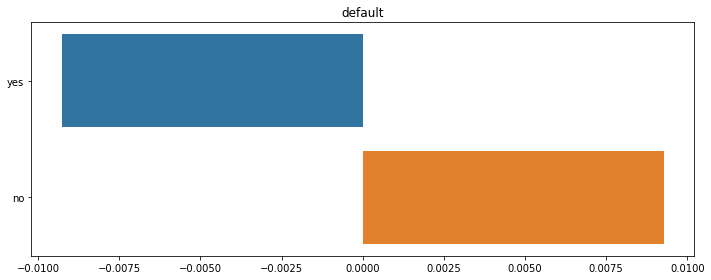

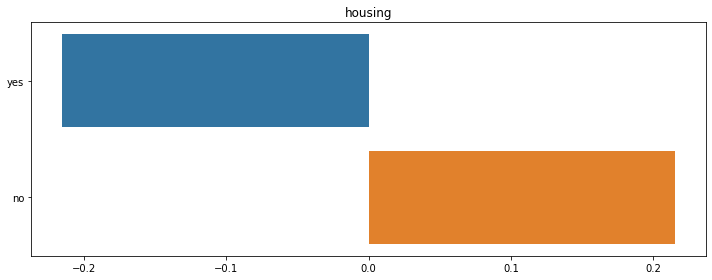

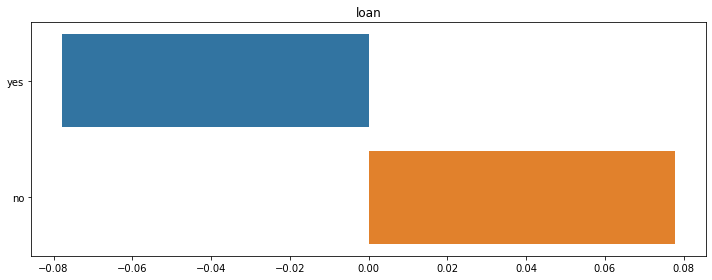

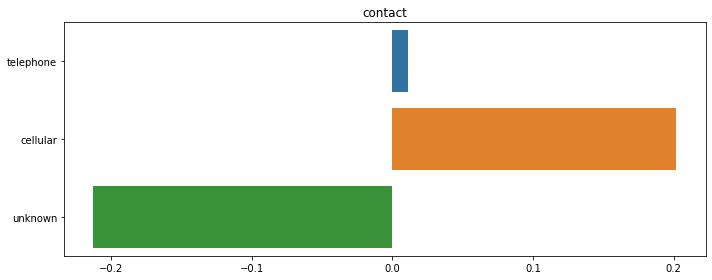

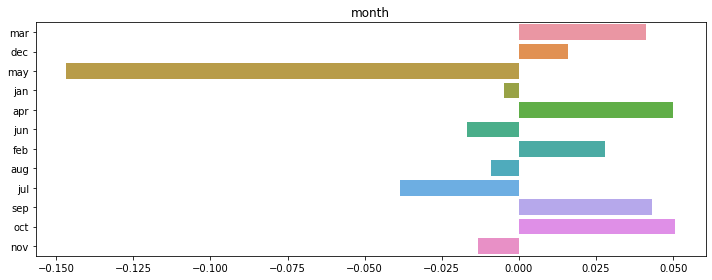

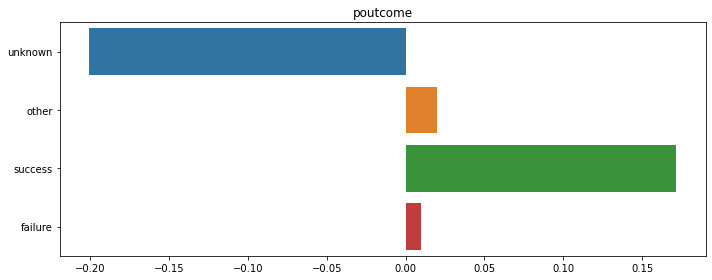

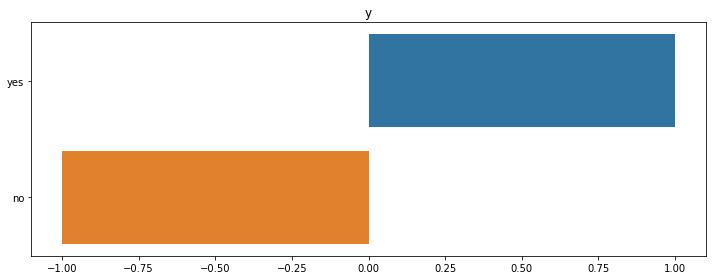

In [15]:
for col in category_cols:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.y.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()


**Inference/Result**:  There are unknown values for many variables in the Data set. There are many ways to handle missing data. One of the ways is to discard the row but that would lead to reduction of data set and hence would not serve our purpose of building an accurate and realistic prediction model.

Other method is to smartly infer the value of the unknown variable from the other variables. This a way of doing an imputation where we use other independent variables to infer the value of the missing variable. This doesn't gurantee that all missing values will be addressed but majority of them will have a reasonable which can be useful in the prediction.

Variables with unknown/missing values are : 'education', 'job', 'housing', 'loan', 'deafult', and 'marital'. But the significant ones are 'education', 'job', 'housing', and 'loan'. The number of unknowns for 'marital' is very low. The unknown for 'default' variable are considered to be recorded as unknown. It may be possible that customer is not willing to disclose this information to the banking representative. Hence the unknown value in 'default' is actually a separate value.

Therefore, we start with creating new variables for the unknown values in 'education', 'job', 'housing' and 'loan'. We do this to see if the values are missing at random or is there a pattern in the missing values.



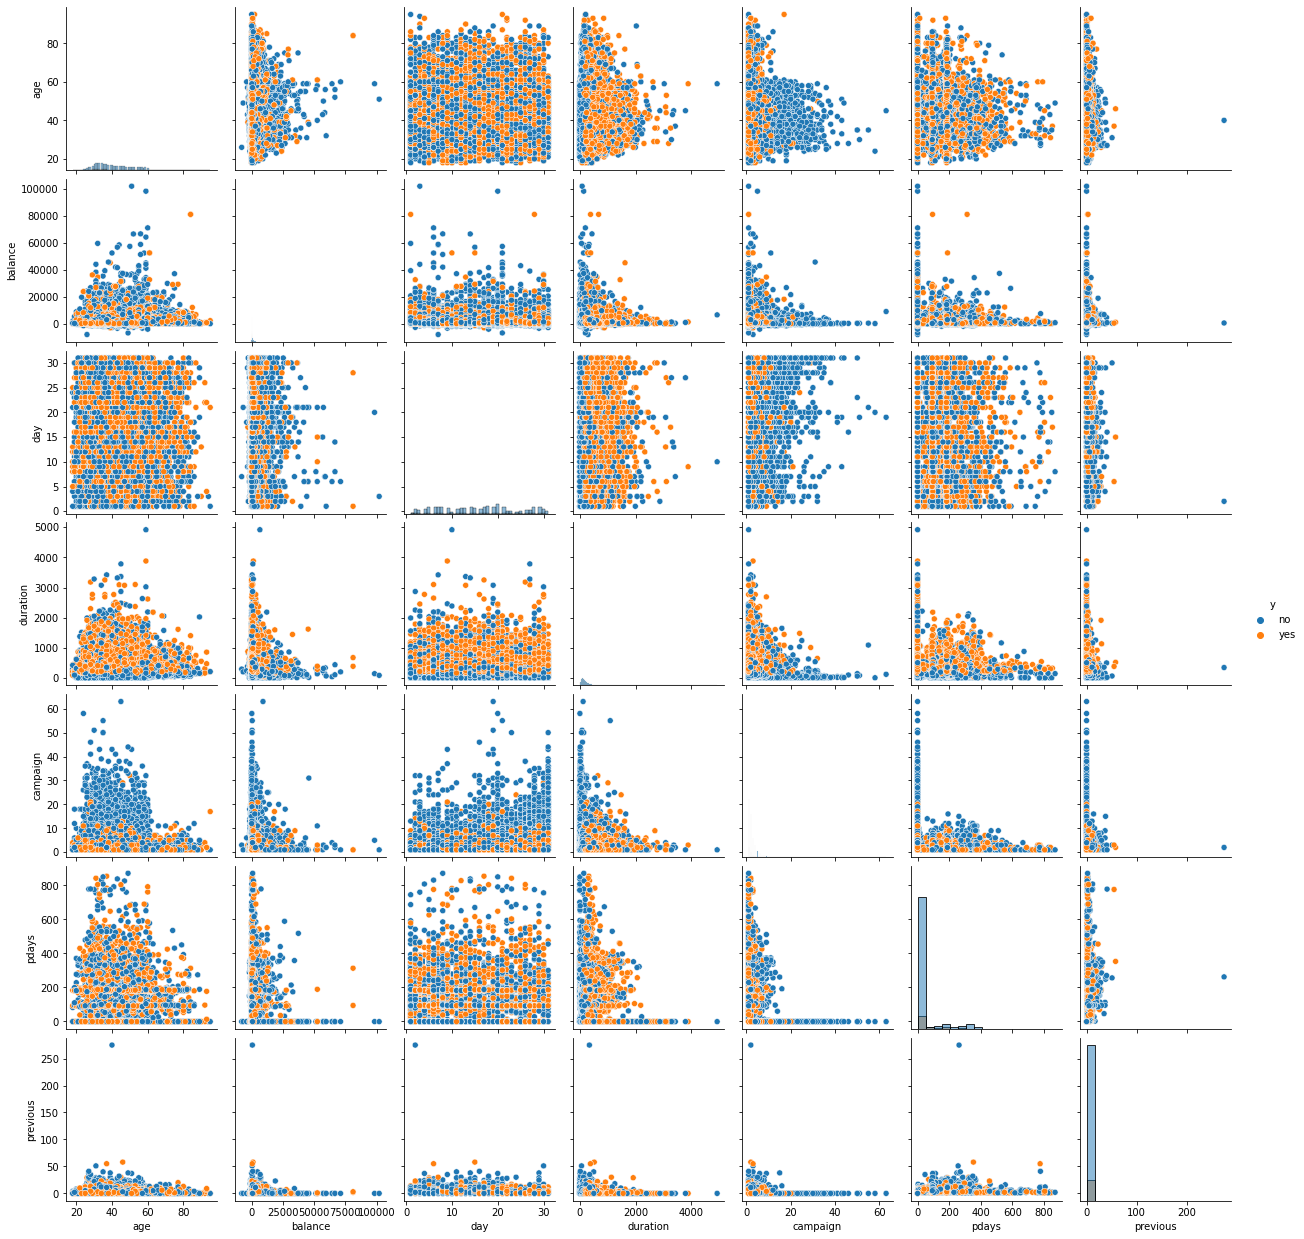

In [16]:
sns.pairplot(df, hue="y",diag_kind="hist")
plt.show()

__Observation:__  
* For most of the variables our pair plot is overlapping a lot.
* Pair plots of age-campaign and day-campaign are much efficient in distinguishing between different classes with very few overlapes.

Text(0.5, 1.0, 'PDF of pdays for target variable y')

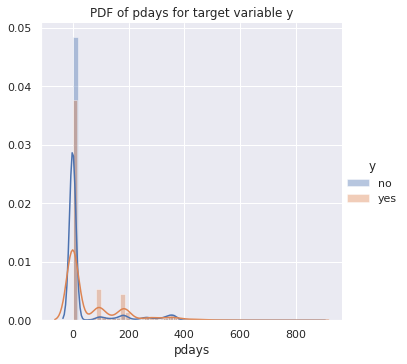

In [17]:
sns.set(rc={'figure.figsize':(20,6)})
sns.FacetGrid(df, hue='y', size=5).map(sns.distplot, 'pdays').add_legend()
plt.title('PDF of pdays for target variable y')

In [18]:
data=df.copy()

Text(0.5, 1.0, 'Count Plot of job for target variable')

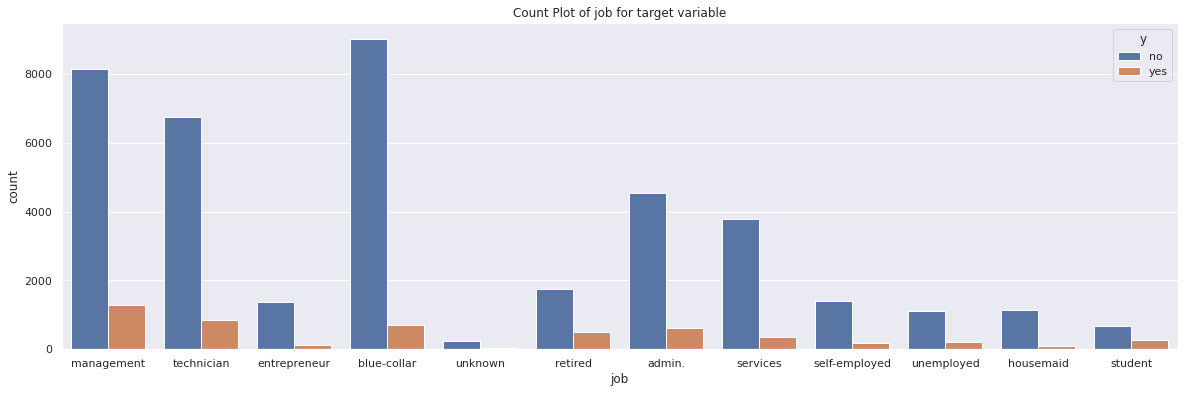

In [19]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=data['job'], data=data, hue=data['y'])
plt.title('Count Plot of job for target variable')

In [20]:
table = PrettyTable(['Job', 'Total Clients', 'Success rate'])
table.add_row(['Blue-collar', len(data[data['job'] == 'blue-collar']), data[data['job'] == 'blue-collar'].y.value_counts()[1]/len(data[data['job'] == 'blue-collar'])])
table.add_row(['Management', len(data[data['job'] == 'management']), data[data['job'] == 'management'].y.value_counts()[1]/len(data[data['job'] == 'management'])])
table.add_row(['Technician', len(data[data['job'] == 'technician']), data[data['job'] == 'technician'].y.value_counts()[1]/len(data[data['job'] == 'technician'])])
table.add_row(['Admin', len(data[data['job'] == 'admin.']), data[data['job'] == 'admin.'].y.value_counts()[1]/len(data[data['job'] == 'admin.'])])
table.add_row(['Services', len(data[data['job'] == 'services']), data[data['job'] == 'services'].y.value_counts()[1]/len(data[data['job'] == 'services'])])
table.add_row(['Retired', len(data[data['job'] == 'retired']), data[data['job'] == 'retired'].y.value_counts()[1]/len(data[data['job'] == 'retired'])])
table.add_row(['Self-employed', len(data[data['job'] == 'self-employed']), data[data['job'] == 'self-employed'].y.value_counts()[1]/len(data[data['job'] == 'self-employed'])])
table.add_row(['Entrepreneur', len(data[data['job'] == 'entrepreneur']), data[data['job'] == 'entrepreneur'].y.value_counts()[1]/len(data[data['job'] == 'entrepreneur'])])
table.add_row(['Unemployed', len(data[data['job'] == 'unemployed']), data[data['job'] == 'unemployed'].y.value_counts()[1]/len(data[data['job'] == 'unemployed'])])
table.add_row(['Housemaid', len(data[data['job'] == 'housemaid']), data[data['job'] == 'housemaid'].y.value_counts()[1]/len(data[data['job'] == 'housemaid'])])
table.add_row(['Student', len(data[data['job'] == 'student']), data[data['job'] == 'student'].y.value_counts()[1]/len(data[data['job'] == 'student'])])
table.add_row(['Unknown', len(data[data['job'] == 'unknown']), data[data['job'] == 'unknown'].y.value_counts()[1]/len(data[data['job'] == 'unknown'])])
print(table)

+---------------+---------------+---------------------+
|      Job      | Total Clients |     Success rate    |
+---------------+---------------+---------------------+
|  Blue-collar  |      9732     | 0.07274969173859433 |
|   Management  |      9458     | 0.13755550856417847 |
|   Technician  |      7597     | 0.11056996182703699 |
|     Admin     |      5171     | 0.12202668729452718 |
|    Services   |      4154     | 0.08883004333172845 |
|    Retired    |      2264     | 0.22791519434628976 |
| Self-employed |      1579     | 0.11842938568714376 |
|  Entrepreneur |      1487     | 0.08271687962340282 |
|   Unemployed  |      1303     | 0.15502686108979277 |
|   Housemaid   |      1240     | 0.08790322580645162 |
|    Student    |      938      |  0.2867803837953092 |
|    Unknown    |      288      | 0.11805555555555555 |
+---------------+---------------+---------------------+


__Observation:__  
* Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'
* Success rate is highest for student

Text(0.5, 1.0, 'Count Plot of poutcome for target variable')

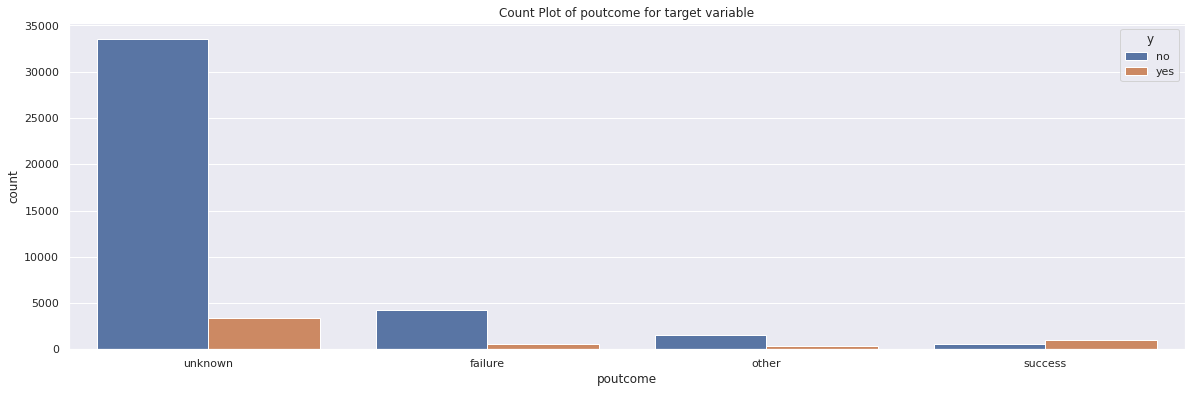

In [21]:
sns.countplot(x=data['poutcome'], data=data, hue=data['y'])
plt.title('Count Plot of poutcome for target variable')

__Observation:__
* Most of the clients contacted have previous outcome as 'unknown'.

Text(0.5, 1.0, 'Count plot of education for target variable y')

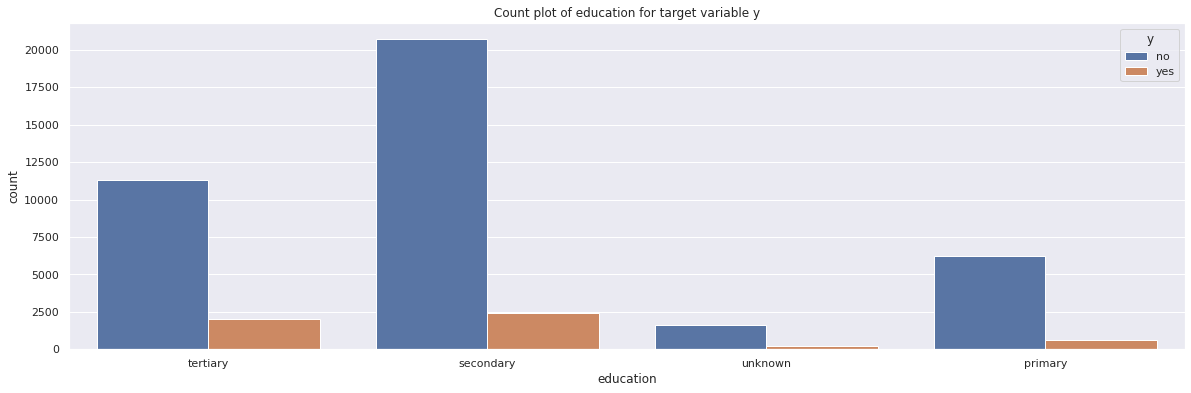

In [22]:
sns.countplot(x=data['education'], data=data, hue=data['y'])
plt.title('Count plot of education for target variable y')

__Observation:__
* Most of the people who are contacted have tertiray or secondary education.

Text(0.5, 1.0, 'Count plot of default for target variable y')

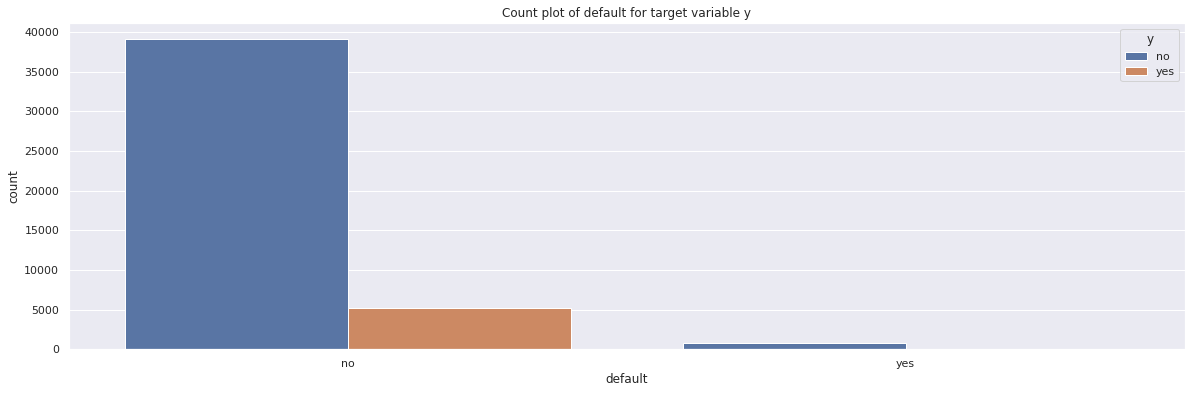

In [23]:
sns.countplot(x=data['default'], data=data, hue=data['y'])
plt.title('Count plot of default for target variable y')

__Observation:__
*   Very few clients are contacted who are defaulter




Text(0.5, 1.0, 'Count plot of loan for target variable y')

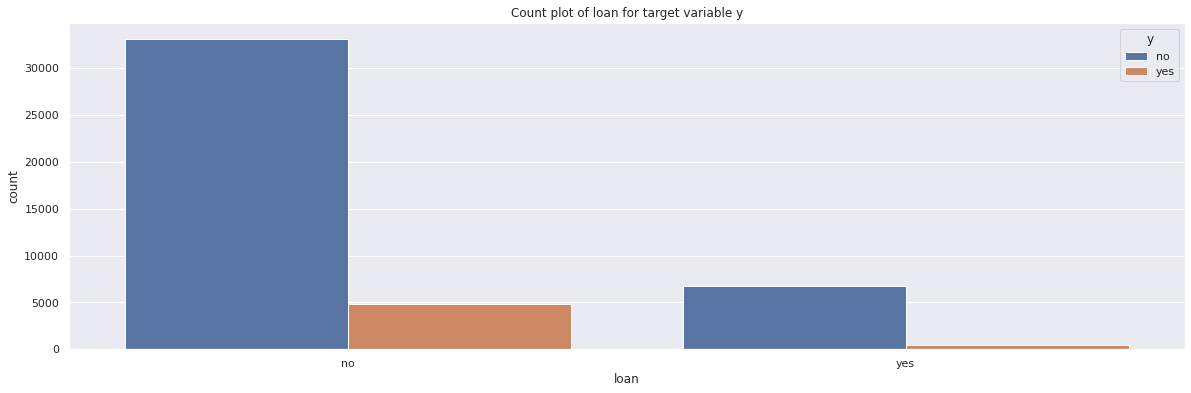

In [24]:
sns.countplot(x=data['loan'], data=data, hue=data['y'])
plt.title('Count plot of loan for target variable y')

__Observation:__  
* As seen for default variable, less client are contacted who have loan.

Text(0.5, 1.0, 'Count plot of contact for target variable y')

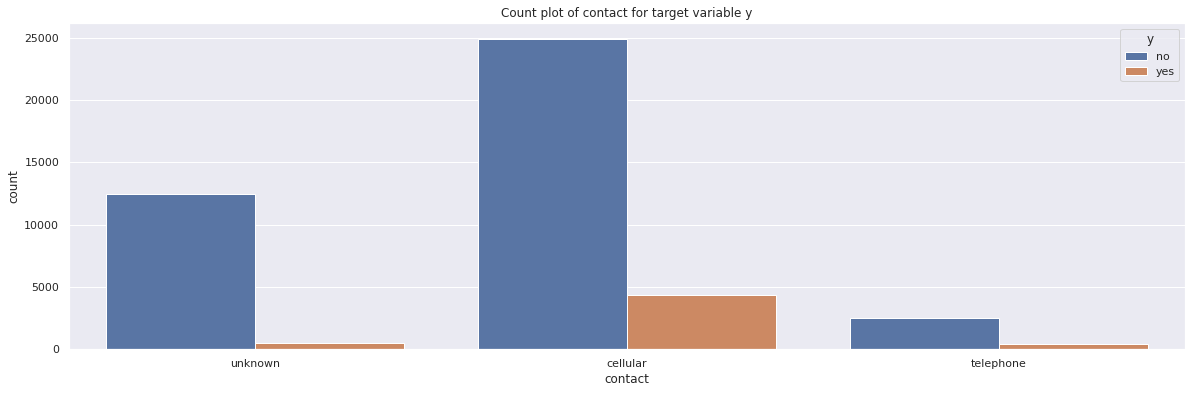

In [25]:
sns.countplot(x=data['contact'], data=data, hue=data['y'])
plt.title('Count plot of contact for target variable y')

__Observation:__  
*   Most of the people are contacted through cellular



Text(0.5, 1.0, 'Count plot of month for target variable y')

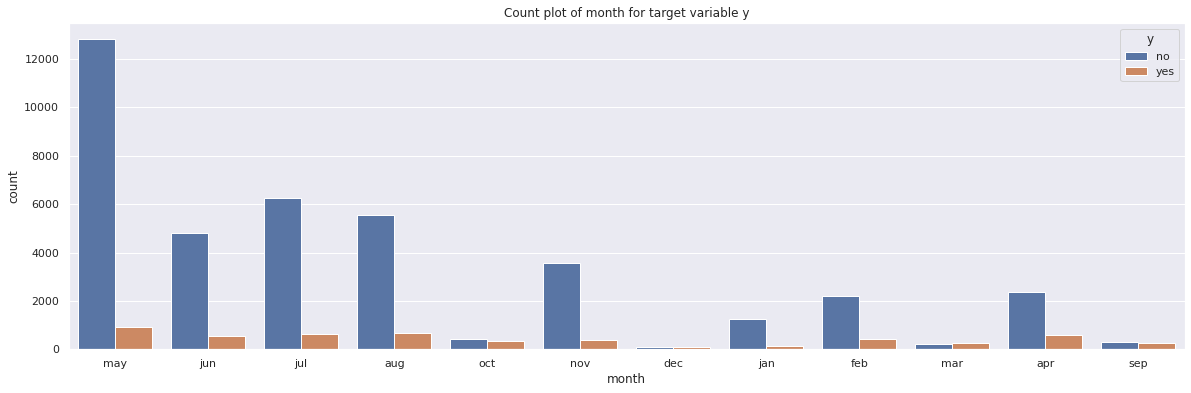

In [26]:
sns.countplot(x=data['month'], data=data, hue=data['y'])
plt.title('Count plot of month for target variable y')

In [27]:
print('Success rate and total clients contacted for different months:')
print('Clients contacted in January: {}, Success rate: {}'.format(len(data[data['month'] == 'jan']), data[data['month'] == 'jan'].y.value_counts()[1]/len(data[data['month'] == 'jan'])))
print('Clients contacted in February: {}, Success rate: {}'.format(len(data[data['month'] == 'feb']), data[data['month'] == 'feb'].y.value_counts()[1]/len(data[data['month'] == 'feb'])))
print('Clients contacted in March: {}, Success rate: {}'.format(len(data[data['month'] == 'mar']), data[data['month'] == 'mar'].y.value_counts()[1]/len(data[data['month'] == 'mar'])))
print('Clients contacted in April: {}, Success rate: {}'.format(len(data[data['month'] == 'apr']), data[data['month'] == 'apr'].y.value_counts()[1]/len(data[data['month'] == 'apr'])))
print('Clients contacted in May: {}, Success rate: {}'.format(len(data[data['month'] == 'may']), data[data['month'] == 'may'].y.value_counts()[1]/len(data[data['month'] == 'may'])))
print('Clients contacted in June: {}, Success rate: {}'.format(len(data[data['month'] == 'jun']), data[data['month'] == 'jun'].y.value_counts()[1]/len(data[data['month'] == 'jun'])))
print('Clients contacted in July: {}, Success rate: {}'.format(len(data[data['month'] == 'jul']), data[data['month'] == 'jul'].y.value_counts()[1]/len(data[data['month'] == 'jul'])))
print('Clients contacted in August: {}, Success rate: {}'.format(len(data[data['month'] == 'aug']), data[data['month'] == 'aug'].y.value_counts()[1]/len(data[data['month'] == 'aug'])))
print('Clients contacted in September: {}, Success rate: {}'.format(len(data[data['month'] == 'sep']), data[data['month'] == 'sep'].y.value_counts()[1]/len(data[data['month'] == 'sep'])))
print('Clients contacted in October: {}, Success rate: {}'.format(len(data[data['month'] == 'oct']), data[data['month'] == 'oct'].y.value_counts()[1]/len(data[data['month'] == 'oct'])))
print('Clients contacted in November: {}, Success rate: {}'.format(len(data[data['month'] == 'nov']), data[data['month'] == 'nov'].y.value_counts()[1]/len(data[data['month'] == 'nov'])))
print('Clients contacted in December: {}, Success rate: {}'.format(len(data[data['month'] == 'dec']), data[data['month'] == 'dec'].y.value_counts()[1]/len(data[data['month'] == 'dec'])))

Success rate and total clients contacted for different months:
Clients contacted in January: 1403, Success rate: 0.10121168923734854
Clients contacted in February: 2649, Success rate: 0.1664779161947905
Clients contacted in March: 477, Success rate: 0.480083857442348
Clients contacted in April: 2932, Success rate: 0.19679399727148705
Clients contacted in May: 13766, Success rate: 0.06719453726572715
Clients contacted in June: 5341, Success rate: 0.10222804718217562
Clients contacted in July: 6895, Success rate: 0.09093546047860769
Clients contacted in August: 6247, Success rate: 0.11013286377461182
Clients contacted in September: 579, Success rate: 0.46459412780656306
Clients contacted in October: 738, Success rate: 0.43766937669376693
Clients contacted in November: 3970, Success rate: 0.10151133501259446
Clients contacted in December: 214, Success rate: 0.4672897196261682


__Observation:__
* Most of the clients (approx 1/3 of total) are contacted in the month of May but the success rate is only 6.7%.
* March have highest success rate.